### Imports

In [3]:
import Functions as F
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Checking Files

In [4]:
#Files in train folder
for dirpath, dirnames, filenames in os.walk("asl_alphabet_train"):
    folder = dirpath.split('\\')[-1]
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{folder}'.")

There are 1 directories and 0 images in 'asl_alphabet_train'.
There are 29 directories and 0 images in 'asl_alphabet_train'.
There are 0 directories and 2812 images in 'A'.
There are 0 directories and 2812 images in 'B'.
There are 0 directories and 2812 images in 'C'.
There are 0 directories and 2812 images in 'D'.
There are 0 directories and 2811 images in 'del'.
There are 0 directories and 2812 images in 'E'.
There are 0 directories and 2812 images in 'F'.
There are 0 directories and 2812 images in 'G'.
There are 0 directories and 2812 images in 'H'.
There are 0 directories and 2812 images in 'I'.
There are 0 directories and 2812 images in 'J'.
There are 0 directories and 2812 images in 'K'.
There are 0 directories and 2812 images in 'L'.
There are 0 directories and 2812 images in 'M'.
There are 0 directories and 2812 images in 'N'.
There are 0 directories and 2812 images in 'nothing'.
There are 0 directories and 2812 images in 'O'.
There are 0 directories and 2812 images in 'P'.
The

In [5]:
#Files in test folder
for dirpath, dirnames, filenames in os.walk("asl_alphabet_test"): 
    folder = dirpath.split('\\')[-1]
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{folder}'.")

There are 1 directories and 0 images in 'asl_alphabet_test'.
There are 29 directories and 0 images in 'asl_alphabet_test'.
There are 0 directories and 189 images in 'A'.
There are 0 directories and 189 images in 'B'.
There are 0 directories and 189 images in 'C'.
There are 0 directories and 189 images in 'D'.
There are 0 directories and 189 images in 'del'.
There are 0 directories and 189 images in 'E'.
There are 0 directories and 189 images in 'F'.
There are 0 directories and 189 images in 'G'.
There are 0 directories and 189 images in 'H'.
There are 0 directories and 189 images in 'I'.
There are 0 directories and 189 images in 'J'.
There are 0 directories and 189 images in 'K'.
There are 0 directories and 189 images in 'L'.
There are 0 directories and 189 images in 'M'.
There are 0 directories and 189 images in 'N'.
There are 0 directories and 189 images in 'nothing'.
There are 0 directories and 189 images in 'O'.
There are 0 directories and 189 images in 'P'.
There are 0 directories

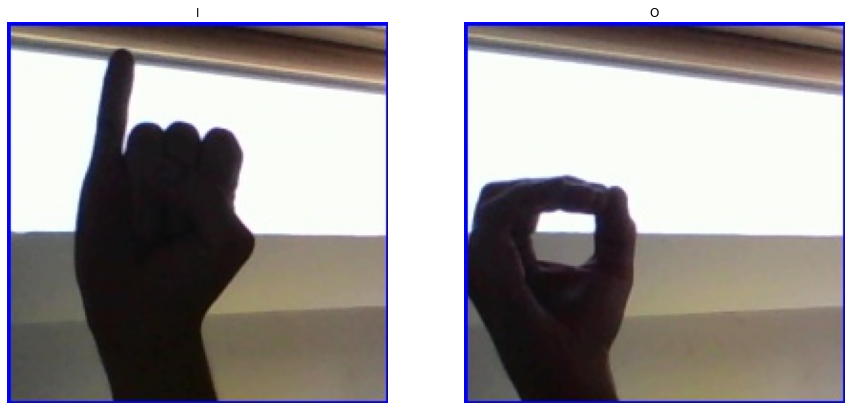

In [6]:
# Printing images
images = F.print_n_random_image('asl_alphabet_train/asl_alphabet_train/', 2, 2)

### Data Loader

In [7]:
IMAGE_SHAPE = (200, 200)
BATCH_SIZE = 32
tf.random.set_seed(42)

train_dir = "asl_alphabet_train/asl_alphabet_train/"
test_dir = "asl_alphabet_test/asl_alphabet_test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
# train data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

Found 81547 images belonging to 29 classes.


In [9]:
# test data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 5481 images belonging to 29 classes.


### Creating a CNN Model

In [10]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=100, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(200, 200, 3)),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(29, activation="softmax")
])

In [11]:
cnn_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [14]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 100)     2800      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 100)     90100     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 100)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [ ]:
fitted_cnn = cnn_model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

## Evaluating and Saving the Model

In [ ]:
loss, acc = cnn_model.evaluate(test_data, verbose=2)
print("accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
cnn_model.save('cnn_model')

## Loading Model

In [15]:
cnn_model = tf.keras.models.load_model('cnn_model')

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 100)     2800      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 100)     90100     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 100)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [17]:
loss, acc = cnn_model.evaluate(test_data, verbose=2)
print("accuracy: {:5.2f}%".format(100 * acc))

172/172 - 479s - loss: 0.0655 - accuracy: 0.9874 - 479s/epoch - 3s/step
accuracy: 98.74%
